##Tirmzi Analysis
n=1000 m+=1000 nm-=120 istep= 4 min=150 max=700

In [1]:
import sys
sys.path
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal

In [2]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is AA1B-997A

 Directory of C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data

08/05/2021  10:31 AM    <DIR>          .
08/05/2021  10:31 AM    <DIR>          ..
08/05/2021  10:24 AM    <DIR>          .ipynb_checkpoints
08/02/2021  02:01 PM    <DIR>          0309-VariedNuni_8_2_2021-0000
08/02/2021  02:15 PM    <DIR>          8_2_2021
08/02/2021  03:39 PM           161,361 8_2_2021_FortranErequals1.ipynb
08/03/2021  01:17 PM           130,779 8_2_2021_PythonErequals1.ipynb
08/02/2021  02:58 PM           130,726 8_2_2021_PythonVariedNuni.ipynb
08/04/2021  02:42 PM           130,779 8_2_2021_PythonVariedNuni-Copy3.ipynb
08/02/2021  02:52 PM    <DIR>          8_2_2021P
08/03/2021  03:01 PM           225,696 8_3_2021_SphereTest_Python.ipynb
08/05/2021  10:30 AM            93,725 852021_FDefaultCapsol.ipynb
08/05/2021  10:31 AM            49,227 852021_PDefaultCapsol.ipynb
08/05/2021  10:31 AM         

In [3]:
import capsol.newanalyzecapsol as ac

In [4]:
ac.get_gridparameters

<function capsol.newanalyzecapsol.get_gridparameters(f_name)>

In [5]:
import glob

In [6]:
folders = glob.glob("Python/*/")
folders


['Python\\PDefaultCapsol\\']

In [7]:
all_data= dict() 
for folder in folders:
    params = ac.get_gridparameters(folder + 'capsol.in')
    data = ac.np.loadtxt(folder + 'C-Z.dat')
    process_data = ac.process_data(params, data, smoothing=False, std=5*10**-9, fortran=False)
    all_data[folder]= (process_data)
all_params= dict()
for folder in folders:
    params=ac.get_gridparameters(folder + 'capsol.in')
    all_params[folder]= (params)

In [8]:
all_data

{'Python\\PDefaultCapsol\\': {'z': array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
         15., 16., 17., 18., 19.]),
  'c': array([6.12709975e-15, 6.12650800e-15, 6.12599413e-15, 6.12552765e-15,
         6.12509304e-15, 6.12468134e-15, 6.12428689e-15, 6.12390594e-15,
         6.12353582e-15, 6.12317462e-15, 6.12282088e-15, 6.12247348e-15,
         6.12213156e-15, 6.12179442e-15, 6.12146148e-15, 6.12113227e-15,
         6.12080641e-15, 6.12048357e-15]),
  'cz': array([-5.91755075e-10, -5.52813804e-10, -4.90174627e-10, -4.50542014e-10,
         -4.23156118e-10, -4.03073835e-10, -3.87698932e-10, -3.75535462e-10,
         -3.65660425e-10, -3.57473442e-10, -3.50567176e-10, -3.44655573e-10,
         -3.39531895e-10, -3.35043034e-10, -3.31073204e-10, -3.27533235e-10,
         -3.24353343e-10, -3.22845723e-10]),
  'czz': array([0.03894127, 0.05079022, 0.0511359 , 0.03350925, 0.02373409,
         0.01772859, 0.01376919, 0.01101925, 0.00903101, 0.00754662,
         0.00

In [9]:
all_data.keys()

dict_keys(['Python\\PDefaultCapsol\\'])

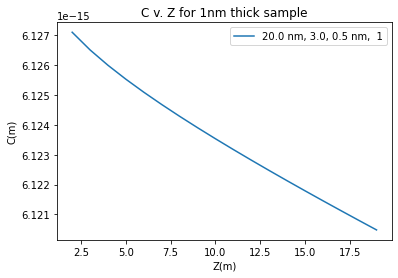

In [10]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == .5}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    Nuni=all_params[key]['Nuni']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm,  {Nuni}')
    
    
plt.title('C v. Z for 1nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for 1nm thick sample 06-28-2021.png")

cut off last experiment because capacitance was off the scale

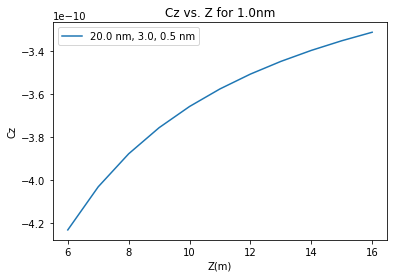

In [11]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == .5}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 1.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

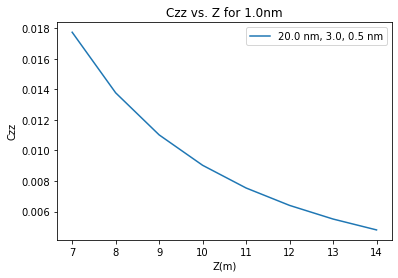

In [12]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == .5}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 1.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [13]:
params

{'n': 500,
 'm+': 500,
 'm-': 10,
 'h0': 0.5,
 'rho_max': 1000000.0,
 'z_max': 1000000.0,
 'min': 2.0,
 'max': 20.0,
 'istep': 2.0,
 'Rtip': 20.0,
 'half-angle': 15.0,
 'HCone': 15000.0,
 'RCantilever': 40000.0,
 'thickness_Cantilever': 500.0,
 'eps_r': 3.0,
 'Thickness_sample': 0.5,
 'Solving Method': 'LAPACK',
 'Test': 0,
 'Verbosity': 0,
 'Nuni': 1,
 'Equally spaced': False}

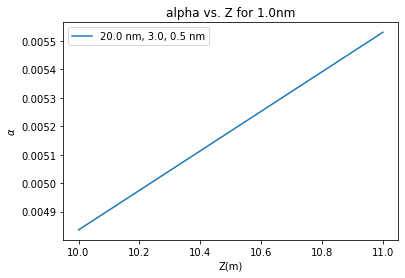

In [14]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == .5}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")

In [15]:
data

{'z': array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19.]),
 'c': array([6.12709975e-15, 6.12650800e-15, 6.12599413e-15, 6.12552765e-15,
        6.12509304e-15, 6.12468134e-15, 6.12428689e-15, 6.12390594e-15,
        6.12353582e-15, 6.12317462e-15, 6.12282088e-15, 6.12247348e-15,
        6.12213156e-15, 6.12179442e-15, 6.12146148e-15, 6.12113227e-15,
        6.12080641e-15, 6.12048357e-15]),
 'cz': array([-5.91755075e-10, -5.52813804e-10, -4.90174627e-10, -4.50542014e-10,
        -4.23156118e-10, -4.03073835e-10, -3.87698932e-10, -3.75535462e-10,
        -3.65660425e-10, -3.57473442e-10, -3.50567176e-10, -3.44655573e-10,
        -3.39531895e-10, -3.35043034e-10, -3.31073204e-10, -3.27533235e-10,
        -3.24353343e-10, -3.22845723e-10]),
 'czz': array([0.03894127, 0.05079022, 0.0511359 , 0.03350925, 0.02373409,
        0.01772859, 0.01376919, 0.01101925, 0.00903101, 0.00754662,
        0.00640893, 0.00551764, 0.00480627, 0.00422935,

In [16]:
from scipy.optimize import curve_fit


In [17]:
def Cz_model(z, a, n, b,):
    return(a*z**n + b)

In [18]:
all_data.keys()

dict_keys(['Python\\PDefaultCapsol\\'])

In [19]:
data= all_data['capsol-calc\\0001-capsol\\']
z= data['z'][1:-1]
cz= data['cz'][1:-1]

KeyError: 'capsol-calc\\0001-capsol\\'

In [ ]:
popt, pcov= curve_fit(Cz_model, z, cz, p0=[cz[0]*z[0], -1, 0])
a=popt[0]
n=popt[1]
b=popt[2]
std_devs= np.sqrt(pcov.diagonal())
sigma_a = std_devs[0]
sigma_n = std_devs[1]
model_output= Cz_model(z, a, n, b)
rmse= np.sqrt(np.mean((cz - model_output)**2))


In [ ]:
f"a= {a} ± {sigma_a}"

In [ ]:
f"n= {n}± {sigma_n}"

In [ ]:
model_output

In [ ]:
"Root Mean Square Error"

In [ ]:
rmse/np.mean(-cz)